# Energy and Buildings

- First name / Family name :
 


## 1. RE2020 (E+C-) at home

Thanks to the 5 videos from CSTB [E+C-](http://www.cstb.fr/fr/actualites/detail/energie-carbone-videos-pedagogiques-1702/), summarize the new standard E+C- (RE2020).

__your results 1>__



## 2. GreEn-ER HVAC system [30min]

Thanks to the previous sketches, depict the behavior of the GreEN-ER HVAC system : [greener_hvac.pdf](img1/greener_hvac.pdf) and [mhi-fluides.pdf](img1/mhi-fluides.pdf).


__your results 2>__




## 3. H358 office: handling sensor data [15min]

From now, our goal will be to generate interesting energy strategies for an office, numbered H358, located at Grenoble INP/Viallet. For this purpose, we are going to follow these steps:
1. Analyzing the available measurements and estimating the solar gains
2. Estimating the magnitude of the physical model parameters of a simplified model for energy management
3. Estimating the magnitude of the physical model parameters related to transient behavior (inertia,...)
4. Adjusting parameters of the simplified physical model to better fit the measurements
5. Comparing the adjusted knowledge model with physic free auto-regressive observation model (also called black box model)
6. Computing rule-based and model-based energy management strategies

Let's start by the begining.

Run the following code plotting data from an office (H358) during winter 2015-2016, October to March. Analyze the data and guess from the names and values what they are corresponding to. What can we say about corridor and H358 office temperatures?

Here is how the sensors are distributed in the H358 office.

![Sensors in H358 office](img1/h358_sensors.png)

In [1]:
import h358measurements

# load the recorded data in the office
h358_data_container = h358measurements.DataContainer('h358data_winter2015-2016.csv', initial_string_date='01/10/2015 00:00:00', final_string_date='01/04/2016 00:00:00')
# plot results
h358_data_container.plot()

variable occupancy replaced because it was already extracted


## 4. Understanding data sampling [15min]

Some data like door or window opening are collected thanks to contact sensors returning 0 or 1 but if you plot the curves, decimal values between 0 and 1 appear. How is it possible? Let's go into data sampling methods by completing the next figures. Explain how values are obtained.

![4 different kinds of sampling](img1/sampling.png)

## 5. H358 office: loss are not waste: sobriety indicators [50min]

Propose 2 indicators to detect energy wastes through window and door in H358 testbed using
- CCO2: CO2 concentration in the office
- Toffice_reference: temperature in the office
- Tcorridor: temperature in the corridor
- Tout: outdoor temperature
- zetaW: time period opening ratio of the window
- zetaD: time period opening ratio of the door
- dT_heat: temperature difference between heater surface and air
- occupancy = ∑ (Plaptop_i > 15W): average number of occupants
Detect the worst day in terms of energy wastes and analyze what happened this day.

In [1]:
import h358measurements

# load the recorded data in the office
h358_data_container = h358measurements.DataContainer('h358data_winter2015-2016.csv', initial_string_date='01/10/2015 00:00:00', final_string_date='01/04/2016 00:00:00')
# extract useful values as list
datetimes = h358_data_container.get_variable('datetime')
CCO2 = h358_data_container.get_variable('office_CO2_concentration')
Toffice_reference = h358_data_container.get_variable('Toffice_reference')
Tout = h358_data_container.get_variable('Tout')
Tcorridor = h358_data_container.get_variable('Tcorridor')
occupancy = h358_data_container.get_variable('occupancy')
window_opening = h358_data_container.get_variable('window_opening')
door_opening = h358_data_container.get_variable('door_opening')
dT_heat = h358_data_container.get_variable('dT_heat')

indicator = list()
for k in range(len(datetimes)):
    ### put your code about waste calculation here  (useful variables: Toffice_reference, Tout, Tcorridor, dT_heat, CCO2, window_opening, door_opening)
    indicator.append(dT_heat[k]>1)
h358_data_container.add_external_variable('example', indicator)
# plot results
h358_data_container.plot()

variable occupancy replaced because it was already extracted


__your results 3>__



## 6. H358 office: air quality indicator [30min]

ICONE indicator is used to measure a containment level. It is defined as follows.

Let $k$ be an instant of a regularly sampled time dataset $(0, T_s, 2T_s,\dots, (n-1)T_s)$. 

Let $O_k$ be the number of occupants in a zone.

Let $C_k$ be the CO2 concentration in the zone at time $k$.

Let $level(C_k, O_k) \in \{-1, 0, 1, 2\}$ such as:
- $O_k=0 \rightarrow level(C_k, O_k) = -1$ (no exposure) 
- $O_k>0$ and $C_k<1000ppm \rightarrow level(C_k, O_k) = 0$ (normal exposure) 
- $O_k>0$ and 1000ppm<$C_k<1700ppm \rightarrow level(C_k, O_k) = 1$ (medium exposure) 
- $O_k>0$ and $C_k>1700ppm \rightarrow level(C_k, O_k) = 2$ (high exposure) 

Let's define the occurrence frequency of a level=$L_i$:
$$
f_i = \frac{\mid\{k/ level(C_k, O_k) = L_i\}\mid}{\mid \{k/ level(C_k, O_k) \ge 0\}\mid}
$$

Because of an admitted logarithmic relationship between stimuli and olfactive sensation, the IC0NE indicator of containment (confinement in French) is defined by:
$$
ICONE = 8.3 log_{10}(1+f_1+3f_2)
$$

The following scale is admitted:
| ICONE | level of containment |
|-------|----------------------|
|   0   |   no containment     |
|   1   |  low containment     |
|   2   | average containment  |
|   3   |  high containment    |
|   4   | very high containment|
|   5   |  extreme containment |

Compute the average level of CO2 during presence during winter 2015-2016, from October to March, as well as the ICONE indicateur: What is the fundamental difference between both indicators?

__Your results 4>__

In [3]:
# example: replace by your calculations

calculation = list()
for k in range(len(datetimes)):
    if occupancy[k] > 0:
        calculation.append(1)
average_CO2_indicator = sum(calculation)
print('example:', average_CO2_indicator)

example: 743


__your results 5>__



## 7. H358 office: solar gain and mask [50min]

The H358 office lies on the south side of a building.

![Facing the H358 office](img1/h358_from_outside.png)

Far solar masks are deduced from a panoramic photography taken with a mobile, and a Google Maps screen shot. Angles in picture and screenshot are then measured using a protractor.

![Solar mask from panoramic photography](img1/solar_mask_panorama.png)

![Solar mask from Google Maps](img1/solar_mask_maps.png)

The close masks are due to the window border. Here is a representation as horizontal (top) and vertical cuts (down).

![Window mask](img1/solar_mask_window.png)

Using the annotated panorama, the GoogleMap screenshot and the window border geometry, determine the solar mask (approximated by a rectangle) and plot it in the generated heliodon. 

![Heliodon at Grenoble](img1/heliodon.png)

What can we say about the period with direct irradiation in the office along the year, taking into account the close and far solar masks? zenital irradiation all the year? When does the sun appears in case of clear sky on October 21st?

__your results 6>__


For information, buildingenergy can generate an heliodon with the following code.

In [1]:
import matplotlib.pyplot
import buildingenergy.openweather
import buildingenergy.sunweather

site_weather_data = buildingenergy.openweather.OpenWeatherMapJsonReader('data/grenoble_weather2015-2019.json', from_stringdate = '01/01/2019 0:00:00', to_stringdate = '01/01/2020 0:00:00', sea_level_in_meter=330, albedo=.1).site_weather_data
solar_model = buildingenergy.sunweather.SolarModel(site_weather_data=site_weather_data)
solar_model.plot_heliodon(2015, 'heliodon')
matplotlib.pyplot.show()

> selected location: Grenoble
* available location> Grenoble


## 8. Analysis of the impact on solar gain in the office H358 [20min]

Using the following code, compare the 2019 solar gain with and without taking into account solar mask and nebulosity and then compare years 2017, 2018 and 2019. What are the main influencing factors of solar gain?

> selected location: Grenoble
* available location> Grenoble
total_solar_gain with mask in kWh: 2293.366000952092
total_solar_gain without mask in kWh: 2353.4074793139466


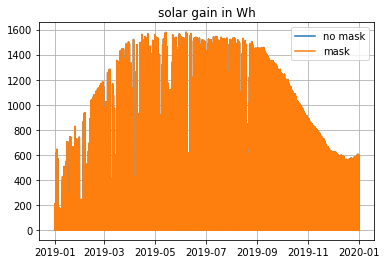

In [4]:
import matplotlib.pyplot
import buildingenergy.solarcollector
import buildingenergy.openweather

# load openweathermap files in json format, coming from https://openweathermap.org
site_weather_data = buildingenergy.openweather.OpenWeatherMapJsonReader('grenoble_weather2015-2019.json', from_stringdate = "1/01/2019 0:00:00", to_stringdate = "1/01/2020 0:00:00",  sea_level_in_meter=330, albedo=.1).site_weather_data
# model of solar maks: TO BE APDATED
solar_mask = buildingenergy.solarcollector.RectangularMask(extreme_azimuts=(-90, 90), extreme_altitudes=(0, 90))
# create a building with window and mask dealing with H358 office
officeH358 = buildingenergy.solarcollector.System(site_weather_data)  ##
officeH358.add_collector('main', surface=2, exposure_in_deg=0, slope_in_deg=90, solar_factor=0.85, window_mask=solar_mask)  ##

# compute the solar gain with mask of H358 office, taking into account solar mask
solar_gains_with_mask, _ = officeH358.solar_gain
print('total_solar_gain with mask in kWh:', sum(solar_gains_with_mask)/1000)
officeH358_nomask = buildingenergy.solarcollector.System(site_weather_data)  ##
officeH358_nomask.add_collector('main', surface=2, exposure_in_deg=0, slope_in_deg=90, solar_factor=0.85, window_mask=None)  ##
# compute the solar gain with mask of H358 office, neglecting solar masks
solar_gains_without_mask, _ = officeH358_nomask.solar_gain
print('total_solar_gain without mask in kWh:', sum(solar_gains_without_mask)/1000)

# plot the results
fig, ax = matplotlib.pyplot.subplots()
matplotlib.pyplot.plot(officeH358_nomask.datetimes, solar_gains_without_mask)
matplotlib.pyplot.plot(officeH358.datetimes, solar_gains_with_mask)
ax.set_title('solar gain in Wh')
ax.legend(('no mask', 'mask'))
ax.axis('tight')
ax.grid()
matplotlib.pyplot.show()

__your results 7>__



## 9 - A Lambda-House used at pre-design stage [30min]

Decisions highly impacting energy needs are taken during the pre-design stage by architects like where to settle a building, what should be the general shape, should we give advantage to heavy structure, should we prefer glassed less insulating but collecting more solar power for which side? and all of this taking into account the local weather and the solar masks. Unfortunately, at this stage, the project is not well defined and tools like Pleiades from IZUBA can't be used.

Here come the lambda-house concept, a standard house used as reference whose characteristics are defined below. It can be settle in any location providing a typical weather file in [OpenWeatherMap](https://openweathermap.org) format is available, latitude, longitude (both included into the weather file) and altitude are given,  together with a optional sky horizon that can be found on [GlobalSolarAtlas](https://globalsolaratlas.info). A lambda-house can be customized by changing the following settings:  

In [2]:
import buildingenergy.lambdahouse

class Configuration(buildingenergy.lambdahouse.Configuration):

    def __init__(self):
        super().__init__()
        # report
        self.report_folder = './rfactory'
        self.report_name = 'report'
        # site
        self.weather_file_name = './data/refuge-des-bans.json'
        self.weather_year = 2019
        self.sea_level_in_meter = 2074
        self.albedo = 0.1
        self.sky_horizon = None
        # lambda house geometry
        self.total_living_surface= 100
        self.height_per_floor = 3
        self.shape_factor = 1
        self.number_of_floors = 1
        self.wall_composition_in_out = (('polystyrene', 16e-2), ('concrete', 13e-2), ('plaster', 13e-3))
        self.roof_composition_in_out = (('brick', 2e-2), ('foam', 16e-2), ('plaster', 13e-3))
        self.glass_composition_in_out = (('glass', 5e-3), ('air', 12e-2), ('glass_foam', 5e-3))
        self.ground_composition_in_out = (('concrete', 13e-2), ('polystyrene', 16e-2), ('gravels', 50e-2))
        self.shape_factors = [.25, .5, .75, 1, 1.25, 1.5, 1.75, 2]
        # lambda house windows
        self.offset_exposure = 0
        self.offset_exposures = [alpha for alpha in range(-90, 90, 5)]
        self.beta = {'north': 0.1, 'west': 0.1, 'east': 0.1, 'south': 0.1}
        self.beta_variation = [0, .1, .2, .4, .8]
        self.solar_factor = 0.85
        self.south_solar_protection_angle = 60
        # lambda house HVAC
        self.high_heating_setpoint = 21
        self.high_heating_setpoints = [18, 19, 20, 21, 22, 23]  # 20 has to be in the list
        self.low_heating_setpoint = 17
        self.cooling_setpoint = 23
        self.air_renewal = 0.8
        self.ventilation_heat_recovery_efficiency = 0.85
        # lambda house occupancy
        self.occupancy_schema = { # days of weeks (1=Monday,...), period (start. hour, end. hour) : avg occupancy
            (1, 2, 3, 4, 5): {(18,8): 3, (8, 18): 0},
            (6, 7): {(0, 24): 2}
            }
        self.average_occupancy_gain = 150
        self.average_permanent_gain = 50
        # lambda house production
        self.PV_efficiency = 0.15

When runing the lambda-house code, a report is generated in the specified report folder ('rfactory' by default) in a Markdown file format (it can be read with Pycharm).

Let's analyze the following location (Saint-Martin-le-Vinoux):

> selected location: Grenoble
* available location> Grenoble
# Report dealing with a lambda-house with weather file data/grenoble_weather2015-2019.json

## Features of the Lambda House


Site
- Weather file name: ./data/grenoble_weather2015-2019.json (year: 2019)
- sea level in meter: 290
- albedo: 0.100000 (reflexion of the ground)
- sky horizon: (AZ:180.000000, AL:15.000000),(AZ:140.000000, AL:7.000000),(AZ:110.000000, AL:10.000000),(AZ:45.000000, AL:10.000000),(AZ:20.000000, AL:7.000000),(AZ:-40.000000, AL:7.000000),(AZ:-45.000000, AL:10.000000),(AZ:-80.000000, AL:23.000000),(AZ:-130.000000, AL:23.000000),(AZ:-140.000000, AL:15.000000),(AZ:-180.000000, AL:7.000000),

Geometry
- total living surface 100m2 (100m2 / floor)
- number of floors 1
- height 3.00m
- shape factor 100% (the higher value the larger the south and north sides, the smaller the west and east sides)
- shape_factors for parametric study: 25%, 50%, 75%, 100%, 125%, 150%, 175%, 200%, 
- wall_composition_in_out
	+ polys

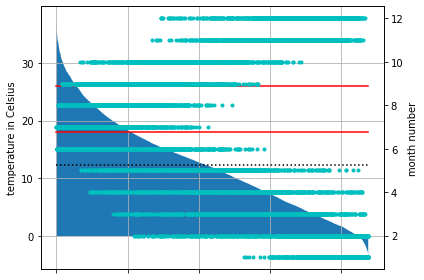

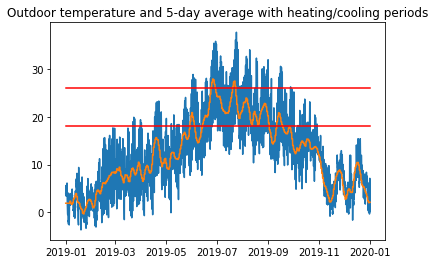

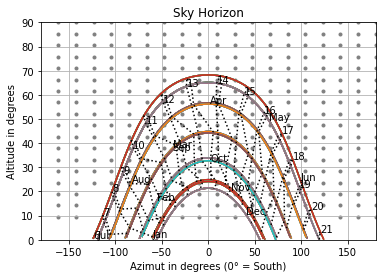

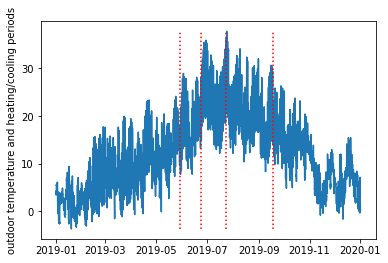

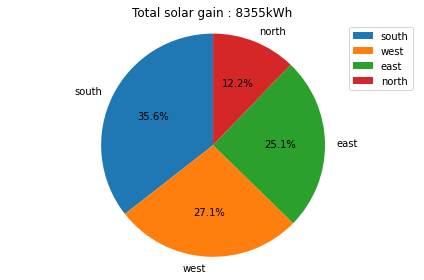

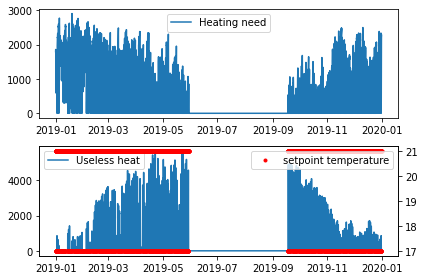

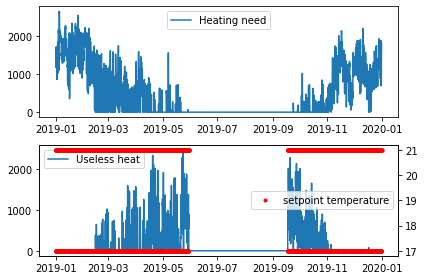

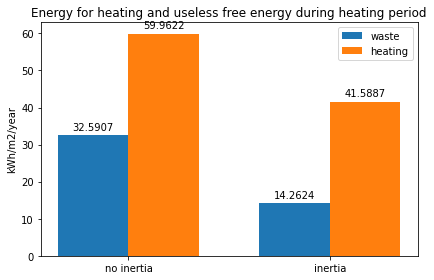

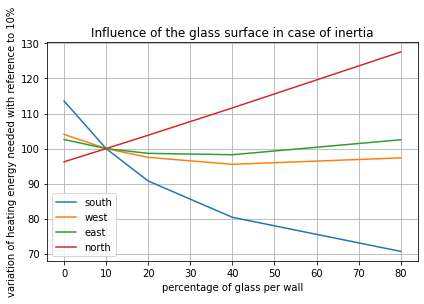

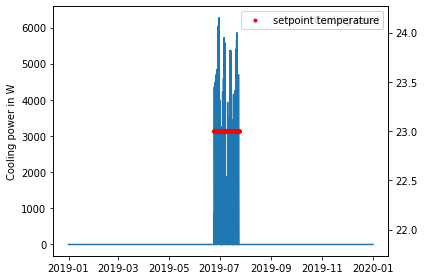

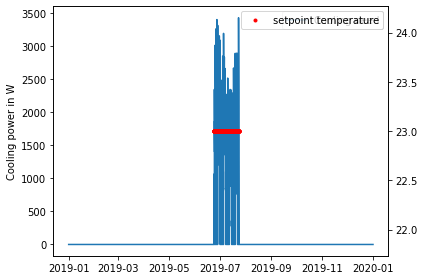

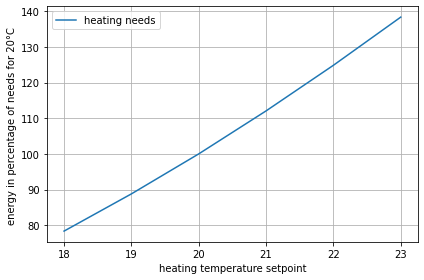

In [3]:
import buildingenergy.lambdahouse

class Configuration(buildingenergy.lambdahouse.Configuration):

    def __init__(self):
        super().__init__()
        # report
        self.report_folder = './SMLV1floor'
        self.report_name = 'report'
        # site
        self.weather_file_name = './data/grenoble_weather2015-2019.json'
        self.weather_year = 2019
        self.sea_level_in_meter = 290
        self.albedo = 0.1
        ## global solar atlas
        self.sky_horizon = [ (360-180,15),(320-180,7),(290-180,10),(225-180,10),(200-180,7),(140-180,7),(135-180,10),(100-180,23),(50-180,23),(40-180,15),(-180,7) ]

buildingenergy.lambdahouse.House(Configuration()).generate_report()

- Analyze the results and comments [10min].

__Your results 8>__ 


- Compare with a 2 floors building (see after) in the same location.

__Your results 9>__

> selected location: Grenoble
* available location> Grenoble
# Report dealing with a lambda-house with weather file data/grenoble_weather2015-2019.json

## Features of the Lambda House


Site
- Weather file name: ./data/grenoble_weather2015-2019.json (year: 2019)
- sea level in meter: 290
- albedo: 0.100000 (reflexion of the ground)
- sky horizon: (AZ:180.000000, AL:15.000000),(AZ:140.000000, AL:7.000000),(AZ:110.000000, AL:10.000000),(AZ:45.000000, AL:10.000000),(AZ:20.000000, AL:7.000000),(AZ:-40.000000, AL:7.000000),(AZ:-45.000000, AL:10.000000),(AZ:-80.000000, AL:23.000000),(AZ:-130.000000, AL:23.000000),(AZ:-140.000000, AL:15.000000),(AZ:-180.000000, AL:7.000000),

Geometry
- total living surface 100m2 (50m2 / floor)
- number of floors 2
- height 3.00m
- shape factor 100% (the higher value the larger the south and north sides, the smaller the west and east sides)
- shape_factors for parametric study: 25%, 50%, 75%, 100%, 125%, 150%, 175%, 200%, 
- wall_composition_in_out
	+ polyst

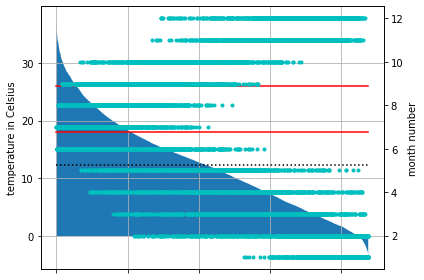

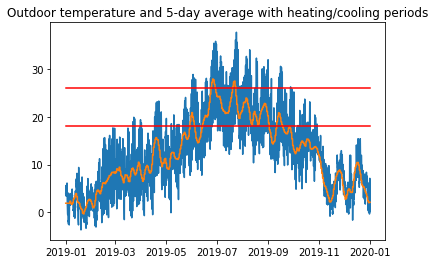

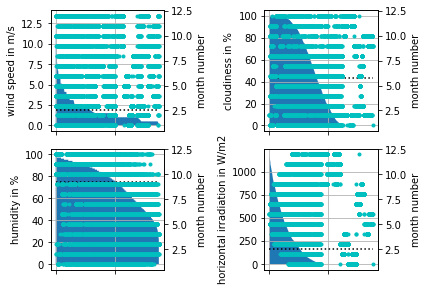

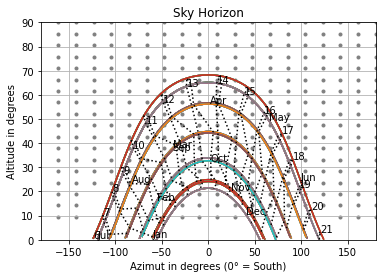

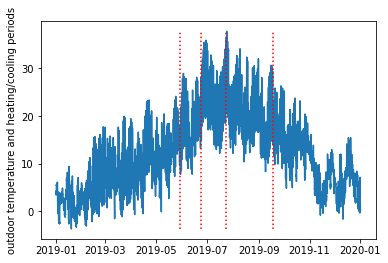

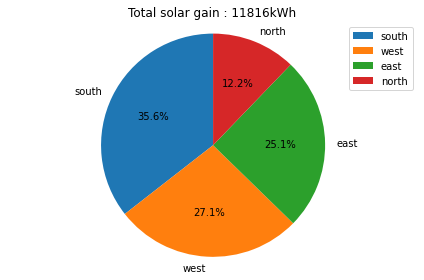

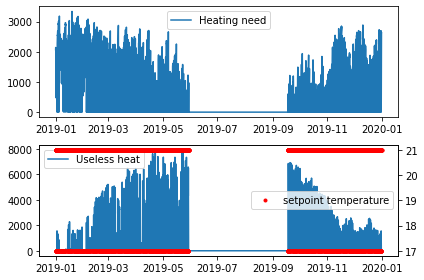

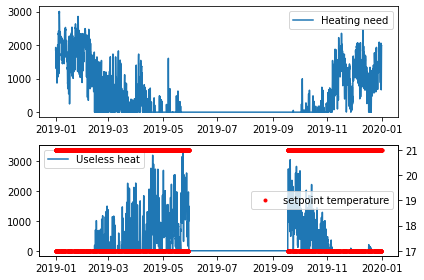

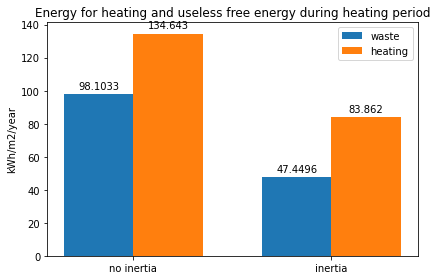

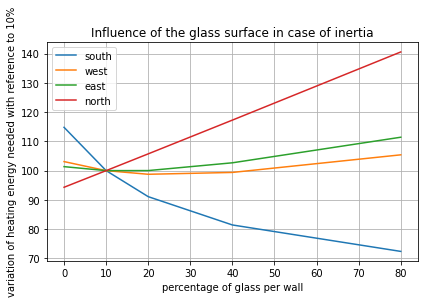

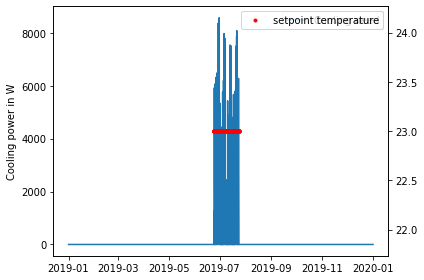

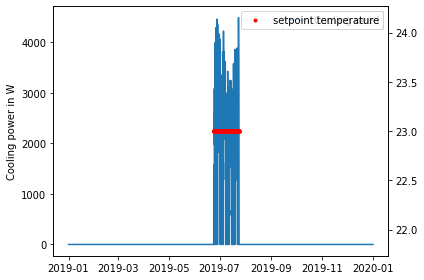

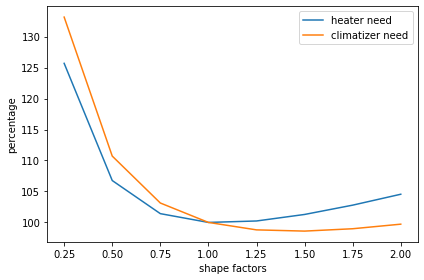

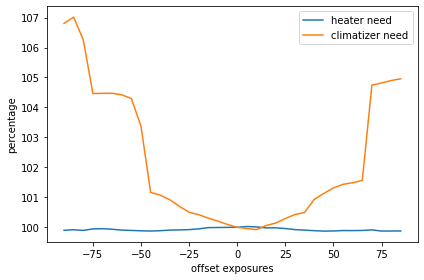

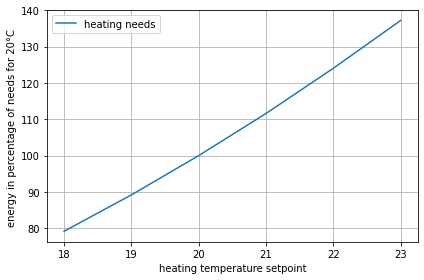

In [7]:
import buildingenergy.lambdahouse

class Configuration(buildingenergy.lambdahouse.Configuration):

    def __init__(self):
        super().__init__()
        # report
        self.report_folder = './SMLV2floors'
        self.report_name = 'report'
        # site
        self.weather_file_name = './data/grenoble_weather2015-2019.json'
        self.weather_year = 2019
        self.sea_level_in_meter = 290
        self.albedo = 0.1
        self.number_of_floors = 2
        ## global solar atlas
        self.sky_horizon = [ (360-180,15),(320-180,7),(290-180,10),(225-180,10),(200-180,7),(140-180,7),(135-180,10),(100-180,23),(50-180,23),(40-180,15),(-180,7) ]

buildingenergy.lambdahouse.House(Configuration()).generate_report()

- Compare now with a 1 floor house at Briançon. How you would design a 1-floor house for Saint-Martin-LeVinoux comparing to one for Briançon? [10min]

__Your results 10>__

> selected location: Custom location
* available location> Custom location
# Report dealing with a lambda-house with weather file data/briancon.json

## Features of the Lambda House


Site
- Weather file name: ./data/briancon.json (year: 2019)
- sea level in meter: 1361
- albedo: 0.100000 (reflexion of the ground)
- sky horizon: (AZ:180.000000, AL:30.000000),(AZ:150.000000, AL:20.000000),(AZ:120.000000, AL:10.000000),(AZ:60.000000, AL:10.000000),(AZ:10.000000, AL:5.000000),(AZ:-40.000000, AL:15.000000),(AZ:-85.000000, AL:10.000000),(AZ:-120.000000, AL:15.000000),(AZ:-130.000000, AL:20.000000),(AZ:-135.000000, AL:23.000000),(AZ:-140.000000, AL:23.000000),(AZ:-165.000000, AL:33.000000),

Geometry
- total living surface 100m2 (100m2 / floor)
- number of floors 1
- height 3.00m
- shape factor 100% (the higher value the larger the south and north sides, the smaller the west and east sides)
- shape_factors for parametric study: 25%, 50%, 75%, 100%, 125%, 150%, 175%, 200%, 
- wall_composition

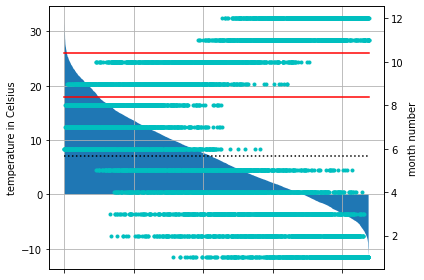

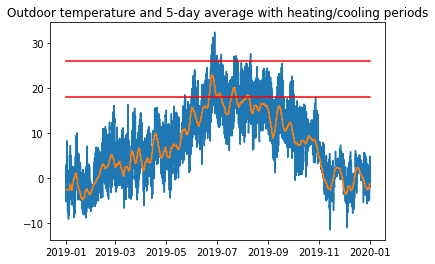

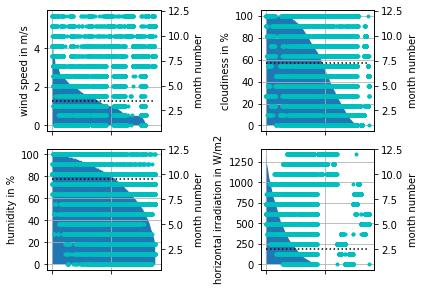

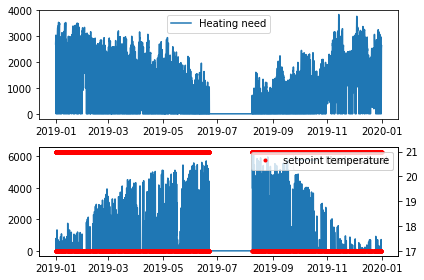

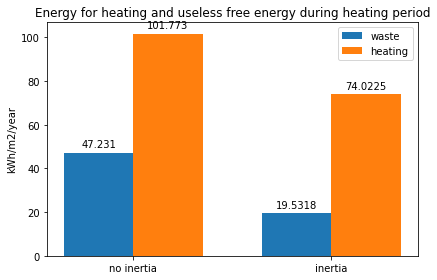

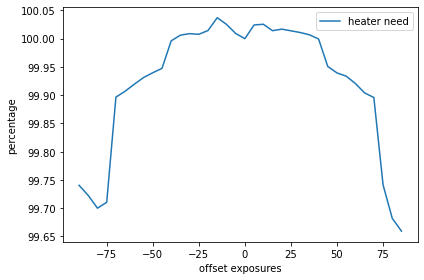

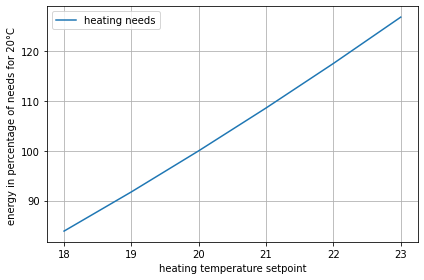

In [8]:
import buildingenergy.lambdahouse

class Configuration(buildingenergy.lambdahouse.Configuration):

    def __init__(self):
        super().__init__()
        # report
        self.report_folder = './briancon'
        self.report_name = 'report'
        # site
        self.weather_file_name = './data/briancon.json'
        self.weather_year = 2019
        self.sea_level_in_meter = 1361
        self.albedo = 0.1
        ## global solar atlas
        self.sky_horizon = [ (360-180,30), (330-180,20), (300-180,10), (240-180,10), (190-180,5), (140-180,15), (95-180,10), (60-180,15), (50-180,20), (45-180,23), (40-180, 23), (15-180,33) ]
if __name__ == '__main__':
    buildingenergy.lambdahouse.House(Configuration()).generate_report()